In [18]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

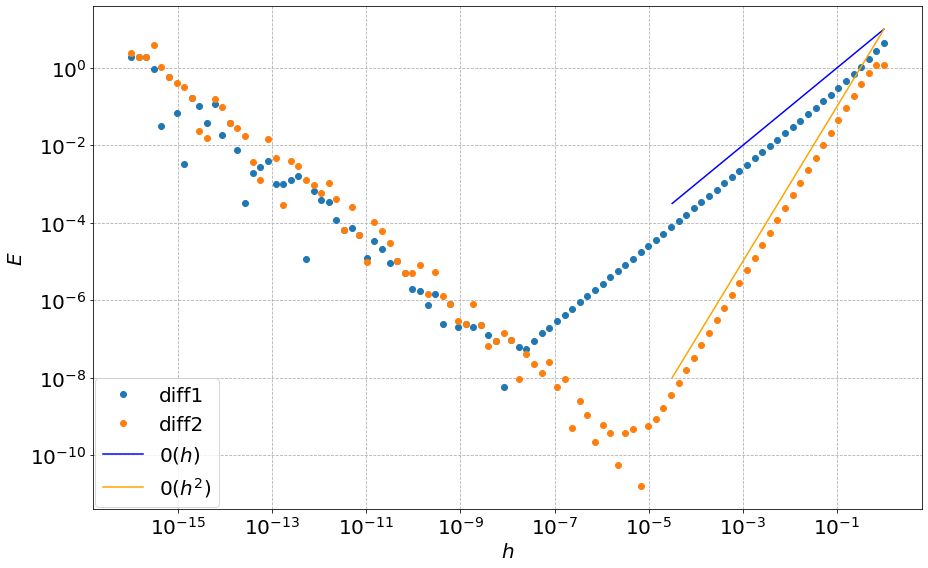

In [26]:
x = 2

def g(x):
    return (x**2) * np.sin(x)


def derivative_g(x):
    return 2 * x * np.sin(x) + (x ** 2) * np.cos(x)


def diff1(x_0, h, f):
    return (f(x_0 + h) - f(x_0)) / h


def diff2(x_0, h, f):
    return (4 * f(x_0 + h) - 3 * f(x_0) - f(x_0 + 2 * h)) / (h + h)


def error_diff1(x, h):
    return np.abs(derivative_g(x) - diff1(x, h, g))


def error_diff2(x, h):
    return np.abs(derivative_g(x) - diff2(x, h, g))


fig, axes = plt.subplots(1, 1, figsize=(13, 8))
h = np.logspace(-16, 0, 100)
h_for_sq = np.logspace(-4.5, 0, 100)


diff_1_line = axes.loglog(h, error_diff1(x, h), 'o', label='diff1')
diff_2_line = axes.loglog(h, error_diff2(x, h), 'o', label='diff2')
axes.grid()
axes.set_xlabel(r'$h$', fontsize=20)
axes.set_ylabel(r'$E$', fontsize=20)
axes.loglog(h_for_sq, 10*h_for_sq, '-', label=r'$0(h)$', color='blue')
axes.loglog(h_for_sq, 10*h_for_sq**2, '-', label=r'$0(h^2)$', color='orange')
axes.tick_params(labelsize=20)

plt.legend(loc='lower left', borderaxespad=0.1, fontsize=20)
plt.tight_layout()
plt.show()

In [49]:
[[id_E1]] = np.argwhere(error_diff1(x, h) == min(error_diff1(x, h)))
h1_opt = h[id_E1]

[[id_E2]] = np.argwhere(error_diff2(x, h) == min(error_diff2(x, h)))
h2_opt = h[id_E2]

print(f"h1_opt = {h1_opt} \nh2_opt = {h2_opt}")

h1_opt = 8.302175681319769e-09 
h2_opt = 6.7341506577508285e-06


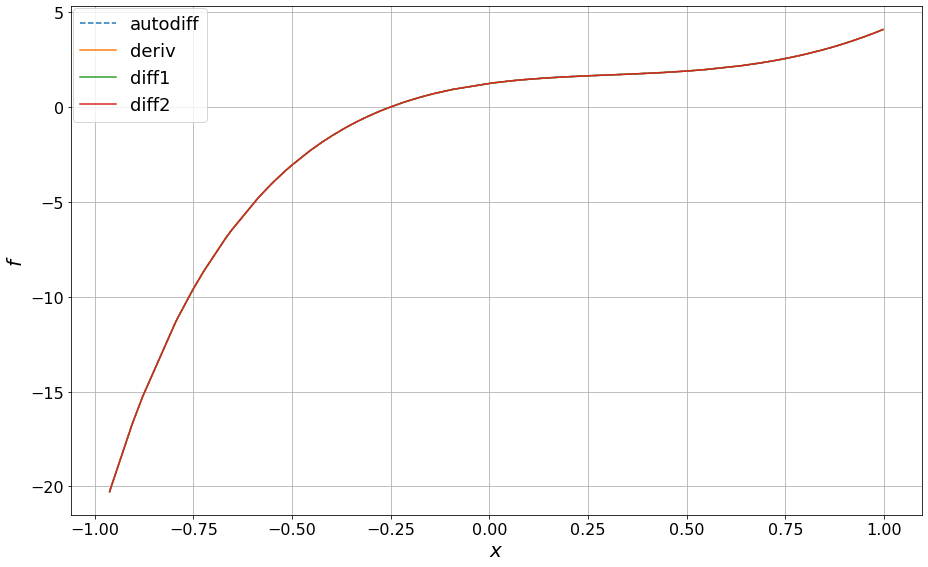

In [51]:
def f(x):
    return (x ** 5 + 2 * x ** 4 - 3 * x ** 3 + 4  * x ** 2 - 5) / (x + 2)

def derivative_f(x):
    return(4 * x ** 5 + 16 * x ** 4 + 10 * x ** 3 - 14 * x ** 2 + 16 * x + 5) / ((x + 2) ** 2)

class AutoDiffNumber:
    def __init__(self, a, b):
        # x = (a1, b1) = a1 + b1 * e
        # y = (a2, b2) = a2 + b2 * e
        self.a=a
        self.b=b
    def __add__(self, other):
         # (a1 + b1 * e) + (a2 + b2 * e) = (a1 + a2) +  (b1 + b2) * e
        if isinstance(other, AutoDiffNumber):
            return AutoDiffNumber(self.a+other.a,self.b+other.b)
        else:
            return AutoDiffNumber(self.a+other,self.b)
        
    def __mul__(self, other):
        # (a1 + b1 * e) * (a2 + b2 * e) = a1 * a2 + (b1 * a2 + a1 * b2)e
        if isinstance(other, AutoDiffNumber):
            return AutoDiffNumber(self.a*other.a,self.b*other.a+self.a*other.b)
        else:
            return AutoDiffNumber(self.a*other,self.b*other)
        
    def __sub__(self, other):
        # (a1 + b1 * e) - (a2 + b2 * e) = (a1 - a2) + (b1 - b2) * e
        if isinstance(other, AutoDiffNumber):
            return AutoDiffNumber(self.a-other.a,self.b-other.b)
        else:
            return AutoDiffNumber(self.a-other,self.b)

    def __truediv__(self, other):
        # (a1 + b1 * e) / (a2 + b2 * e) = (a1 / a2) + (b1 * a2 - a1 * b2) * e / (a2 ** 2)
        if isinstance(other, AutoDiffNumber):
            return AutoDiffNumber(self.a/other.a,((self.b*other.a-self.a*other.b)/other.a**2))
        else:
            return AutoDiffNumber(self.a/other,self.b/other)
        
    def __radd__(other, self):
         # (a1 + b1 * e) + (a2 + b2 * e) = (a1 + a2) +  (b1 + b2) * e
        if isinstance(other, AutoDiffNumber):
            return AutoDiffNumber(self.a+other.a,self.b+other.b)
        else:
            return AutoDiffNumber(self.a+other,self.b)
        
    def __rmul__(self, other):
        # (a1 + b1 * e) * (a2 + b2 * e) = a1 * a2 + (b1 * a2 + a1 * b2)e
        if isinstance(other, AutoDiffNumber):
            return AutoDiffNumber(self.a*other.a,self.b*other.a+self.a*other.b)
        else:
            return AutoDiffNumber(self.a*other,self.b*other)
        
    def __rsub__(other, self):
        # (a1 + b1 * e) - (a2 + b2 * e) = (a1 - a2) + (b1 - b2) * e
        if isinstance(other, AutoDiffNumber):
            return AutoDiffNumber(self.a-other.a,self.b-other.b)
        else:
            return AutoDiffNumber(self.a-other,self.b)

    def __rtruediv__(other, self):
        # (a1 + b1 * e) / (a2 + b2 * e) = (a1 / a2) + (b1 * a2 - a1 * b2) * e / (a2 ** 2)
        if isinstance(other, AutoDiffNumber):
            return AutoDiffNumber(self.a/other.a,((self.b*other.a-self.a*other.b)/other.a**2))
        else:
            return AutoDiffNumber(self.a/other,self.b/other)    
        
    def __pow__(self, p):
        # (a1 + b1 * e) ** n = a1 ** n + b1 * n * a1 ** (n - 1) * e
        return AutoDiffNumber(self.a**p,(self.b*p*self.a**(p-1)))
        
def forward_autodiff(f,x):
    auto_number = AutoDiffNumber(x, 1)
    result = f(auto_number)
    return(result.b)


points = np.random.uniform(low=-1, high=1, size=(100,))
points.sort()

autodiff = []
deriv = []
diff1_p = []
diff2_p = []


for i in range(0, 100):
    autodiff.append(forward_autodiff(f, points[i]))
    deriv.append(derivative_f(points[i]))
    diff1_p.append(diff1(points[i], h1_opt, f))
    diff2_p.append(diff2(points[i], h2_opt, f))
    
fig, ax = plt.subplots(1, 1, figsize=(13, 8)) 
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)
plt.rc('grid', linestyle="-")
ax.plot(points, autodiff, '--', label = 'autodiff')
ax.plot(points, deriv, '-', label = 'deriv')
ax.plot(points, diff1_p, '-', label = 'diff1')
ax.plot(points, diff2_p, '-', label = 'diff2')
ax.grid()
ax.set_xlabel(r'$x$', fontsize = 20)
ax.set_ylabel(r'$f$', fontsize = 20)
ax.legend(loc='upper left', borderaxespad=0.1, fontsize=18)
plt.tight_layout()
plt.show()

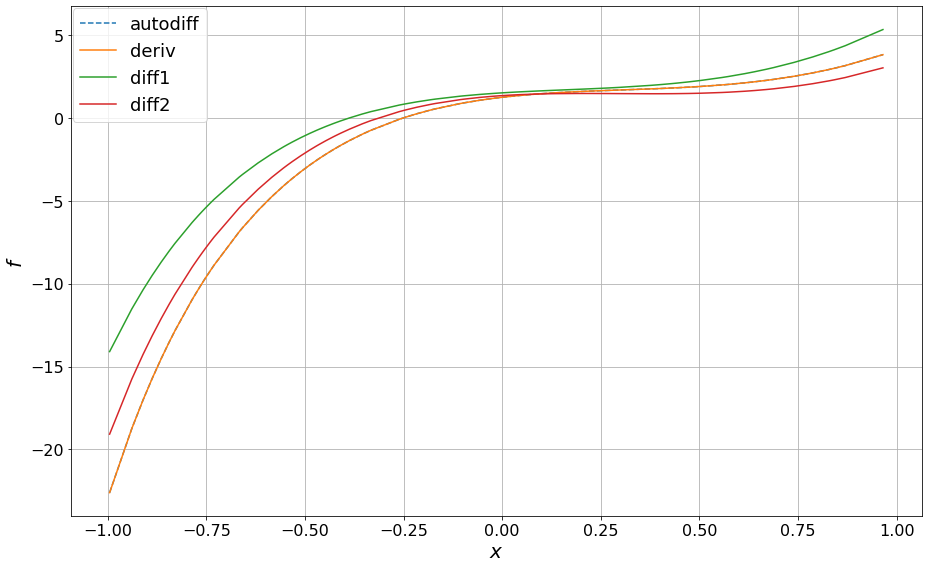

In [50]:
autodiff = []
deriv = []
diff1_p = []
diff2_p = []

h_for_ex = 0.3

for i in range(0, 100):
    autodiff.append(forward_autodiff(f, points[i]))
    deriv.append(derivative_f(points[i]))
    diff1_p.append(diff1(points[i], h_for_ex, f))
    diff2_p.append(diff2(points[i], h_for_ex, f))
    
fig, ax = plt.subplots(1, 1, figsize=(13, 8)) 
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)
plt.rc('grid', linestyle="-")
ax.plot(points, autodiff, '--', label = 'autodiff')
ax.plot(points, deriv, '-', label = 'deriv')
ax.plot(points, diff1_p, '-', label = 'diff1')
ax.plot(points, diff2_p, '-', label = 'diff2')
ax.grid()
ax.set_xlabel(r'$x$', fontsize = 20)
ax.set_ylabel(r'$f$', fontsize = 20)
ax.legend(loc='upper left', borderaxespad=0.1, fontsize=18)
plt.tight_layout()
plt.show()

In [46]:
print ("  i    x                    autodiff             deriv               diff1_p            diff2_p")
for i in range(0, 100):
    print('{0:3d} {1:20.15f} {2:20.15f} {3:20.15f} {4:20.15f} {5:20.15f}'.format(i, points[i], autodiff[i], deriv[i], diff2_p[i], diff1_p[i]))

  i    x                    autodiff             deriv               diff1_p            diff2_p
  0   -0.971478249837009  -20.924296206161006  -20.924296206161006  -20.924296202949790  -20.924296015496072
  1   -0.969417583487012  -20.781193386359984  -20.781193386359980  -20.781193383238449  -20.781193301808706
  2   -0.967451036053786  -20.645456044876649  -20.645456044876649  -20.645456041767520  -20.645455883426944
  3   -0.914402784153407  -17.270063144438929  -17.270063144438932  -17.270063141839582  -17.270062918087490
  4   -0.899163577925292  -16.394576880153998  -16.394576880153998  -16.394576877763743  -16.394576684703804
  5   -0.885244774506944  -15.628400746563999  -15.628400746563999  -15.628400744111351  -15.628400560773784
  6   -0.853725226988189  -14.003910996830699  -14.003910996830699  -14.003910994865048  -14.003910912095991
  7   -0.833101726781826  -13.018354094663490  -13.018354094663490  -13.018354092854125  -13.018353981615972
  8   -0.825675539266228  -12.67